In [53]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Overview

In this notebook, we will explore two datasets:
1) Covid-19 related data
2) Air Quality Index data

The idea is to compare data from both datasets to understand whether covid-19 had any impact on the Air Quality. According to IQAir (https://www.iqair.com/malta), in 2021, Malta's most polluted city was L-Imsida and therefore we will be analysizing whether the Air Quality had improved, worsened, or remained as is during the covid period 2020 - 2022.

In [54]:
AQIfile = open( './Data/msida-AQI.csv', 'r')
CovidTestsfile = open( './Data/COVIDTests.csv', 'r')
CovidCasesfile = open('./Data/COVID19.csv')


# Data Preperation

The first step is to understand the data. Both of the datasets will be imported into dataframes to visualise the data better. Since covid started in 2020, we will be removing older data (<2020) from the AQI Dataset.


In [55]:
def chr_int(a):
    if a.isdigit():
        return int(a)
    else:
        return 0
                
AQIdata=[]
for line in AQIfile:
    data1=line.split(',')
    if len(data1)==7:
        AQIdata.append([pd.to_datetime(data1[0],format="%d/%m/%Y"),chr_int(data1[1]),chr_int(data1[2]),chr_int(data1[3]),chr_int(data1[4]),chr_int(data1[5]),chr_int(data1[6])])
        
covidtestsdata=[]
for line in CovidTestsfile:
    data1=line.split(',')
    if len(data1)==7:
        covidtestsdata.append([pd.to_datetime(data1[0],format="%d/%m/%Y"),chr_int(data1[1]),chr_int(data1[2]),chr_int(data1[3]),chr_int(data1[4]),chr_int(data1[5]),chr_int(data1[6])])  
        
covidcases=[]
for line in CovidCasesfile:
    data1=line.split(',')
    if len(data1)==6:
        covidcases.append([pd.to_datetime(data1[0],format="%d/%m/%Y"),chr_int(data1[1]),chr_int(data1[2]),chr_int(data1[3]),chr_int(data1[4]),chr_int(data1[5])])          

In [56]:

aqi_df = pd.DataFrame(AQIdata) 
covidtests_df = pd.DataFrame(covidtestsdata)
covidcases_df = pd.DataFrame(covidcases)

In [57]:
aqi_df.dtypes

0    datetime64[ns]
1             int64
2             int64
3             int64
4             int64
5             int64
6             int64
dtype: object

In [58]:
covidtests_df.dtypes

0    datetime64[ns]
1             int64
2             int64
3             int64
4             int64
5             int64
6             int64
dtype: object

In [59]:
covidcases_df.dtypes

0    datetime64[ns]
1             int64
2             int64
3             int64
4             int64
5             int64
dtype: object

In [60]:
aqi_df.columns = ["Date", "pm25", "pm10", "o3", 
                "no2", "so2", "co"]


covidtests_df.columns = ["Date","NAA tests in previous day","Total NAA tests","Rapid antigen tests in previous day","Total rapid antigen tests",
                         "NAA and rapid antigen tests in previous day","Total NAA and rapid antigen tests"]

covidcases_df.columns = ["Date","New Cases","Total Cases","Recovered","Deaths","Active Cases"]


In [61]:
aqi_df = aqi_df.sort_values('Date')
aqi_df = aqi_df[aqi_df.Date >= '2020-07-20']

In [62]:
covidtests_df = covidtests_df[covidtests_df.Date >= '2020-07-20' ]
covidtests_df = covidtests_df.sort_values('Date')

In [63]:
covidcases_df = covidcases_df[covidcases_df.Date >= '2020-07-20']
covidcases_df = covidcases_df.sort_values('Date')

In [64]:
covidcases_df

,Date,New Cases,Total Cases,Recovered,Deaths,Active Cases
136,2020-07-20,1,677,664,9,0
137,2020-07-21,0,677,664,9,0
138,2020-07-22,2,679,665,9,0
139,2020-07-23,1,680,665,9,0
140,2020-07-24,6,686,665,9,0
...,...,...,...,...,...,...
1024,2022-12-25,16,116247,114763,813,0
1025,2022-12-26,6,116253,114773,813,0
1026,2022-12-27,27,116280,114787,813,0
1027,2022-12-28,23,116303,114814,813,0


# Data Exploration

In this step, we will be exploring the datasets and seeing different trends within each dataset

In [65]:
covidcases_df['YearMonth'] = covidcases_df.Date.dt.to_period('M')

In [66]:
MonthlyCovidCases_df =  covidcases_df.groupby([covidcases_df['YearMonth']]).agg({'New Cases':sum})
#.plot(legend=True)

In [67]:
MonthlyDeaths_df = covidcases_df.groupby([covidcases_df['YearMonth']]).agg({'Deaths':max})
MonthlyDeaths_df = MonthlyDeaths_df['Deaths'] - MonthlyDeaths_df['Deaths'].shift(fill_value=0)
MonthlyCovidCases_df["New Deaths"] = MonthlyDeaths_df

In [68]:
MonthlyRecoveries_df = covidcases_df.groupby([covidcases_df['YearMonth']]).agg({'Recovered':max})
MonthlyRecoveries_df = MonthlyRecoveries_df['Recovered'] - MonthlyRecoveries_df['Recovered'].shift(fill_value=0)
MonthlyCovidCases_df["New Recoveries"] = MonthlyRecoveries_df

In [70]:
covidtests_df['YearMonth'] = covidtests_df.Date.dt.to_period('M')

In [74]:
MonthlyNAA_df = covidtests_df.groupby([covidtests_df['YearMonth']]).agg({'NAA tests in previous day':sum})
MonthlyCovidTests_df = MonthlyNAA_df

In [76]:
MonthlyRapid_df = covidtests_df.groupby([covidtests_df['YearMonth']]).agg({'Total rapid antigen tests':sum})
MonthlyCovidTests_df["Total Rapid tests"] = MonthlyRapid_df

In [77]:
MonthlyRapidNAA_df = covidtests_df.groupby([covidtests_df['YearMonth']]).agg({'NAA and rapid antigen tests in previous day':sum})
MonthlyCovidTests_df["Total Tests"] = MonthlyRapidNAA_df

In [117]:
MonthlyCovidCases_df = MonthlyCovidCases_df.rename_axis(['YearMonth']).reset_index()


# Analysis

From the below barchart, we can see that December 2020 had the highest number of recorded deaths

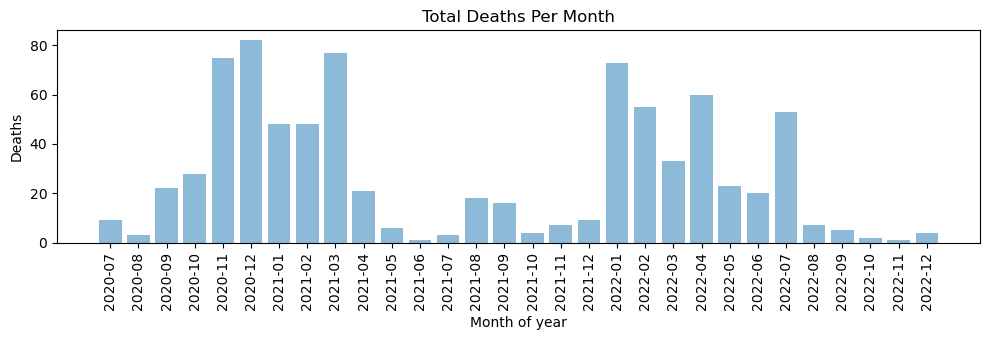

In [150]:
plt.rcParams["figure.figsize"] = [10.00, 3.50]
default_x_ticks = range(len(MonthlyCovidCases_df))
plt.bar(default_x_ticks, MonthlyCovidCases_df['New Deaths'],align='center', alpha=0.5)
plt.xticks(default_x_ticks, MonthlyCovidCases_df['YearMonth'], rotation='vertical')
plt.ylabel('Deaths')
plt.xlabel('Month of year')
plt.title('Total Deaths Per Month')
plt.show()

Although the number of deaths per month were significantly high, when compared to the number of cases reported monthly, the number of c

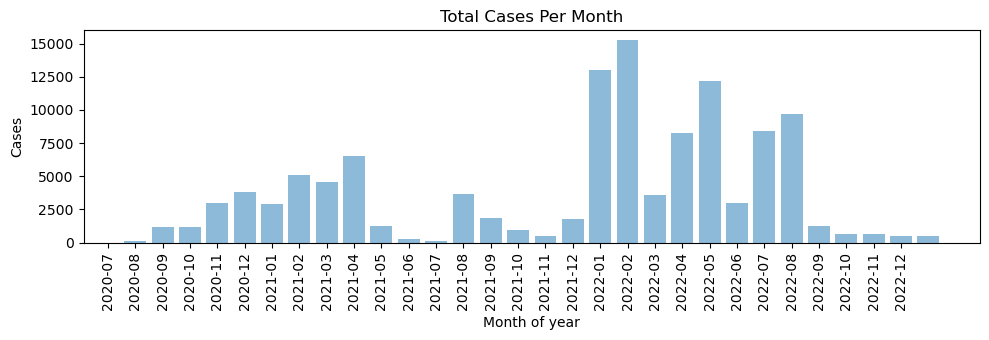

In [168]:
plt.rcParams["figure.figsize"] = [10.00, 3.50]
default_x_ticks = np.arange(len(MonthlyCovidCases_df))
plt.bar(default_x_ticks+1, MonthlyCovidCases_df['New Cases'],align='center', alpha=0.5, label='Cases')
plt.xticks(default_x_ticks, MonthlyCovidCases_df['YearMonth'], rotation='vertical')
plt.ylabel('Cases')
plt.xlabel('Month of year')
plt.title('Total Cases Per Month')
plt.show()

In [197]:
raw_data = {'Percentage': (MonthlyCovidCases_df['New Deaths'].div(MonthlyCovidCases_df['New Cases']))*100}
DeathPerCases = pd.DataFrame(raw_data)
DeathPerCases["YearMonth"] = MonthlyCovidCases_df['YearMonth']


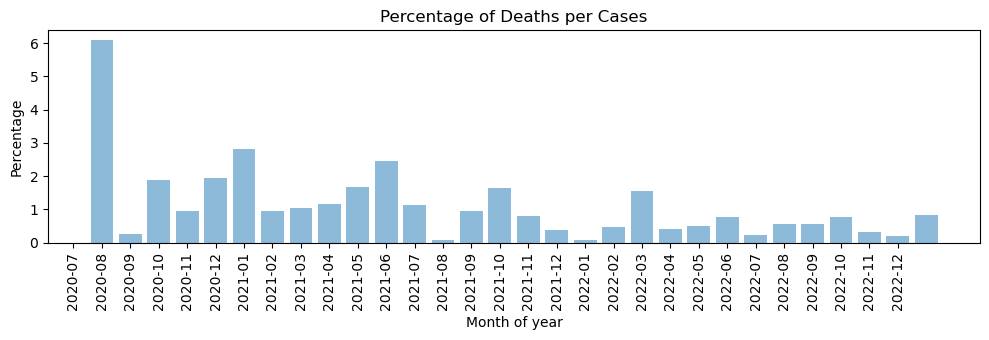

In [200]:
plt.rcParams["figure.figsize"] = [10.00, 3.50]
default_x_ticks = np.arange(len(DeathPerCases))
plt.bar(default_x_ticks+1, DeathPerCases['Percentage'],align='center', alpha=0.5, label='Percentage of Deaths')
plt.xticks(default_x_ticks, DeathPerCases['YearMonth'], rotation='vertical')
plt.ylabel('Percentage')
plt.xlabel('Month of year')
plt.title('Percentage of Deaths per Cases')
plt.show()

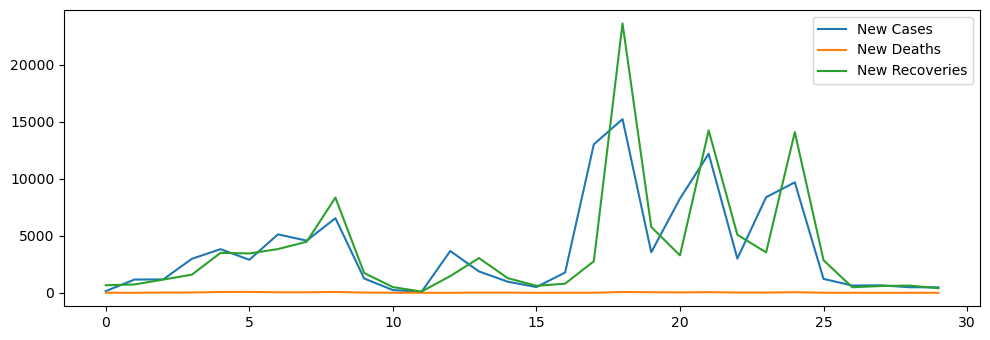

In [201]:
MonthlyCovidCases_df_pt = MonthlyCovidCases_df.plot(legend=True)

In [220]:
#MonthlyNewCases_df = covidcases_df.groupby([covidcases_df['Date'].rename('Year').dt.year, covidcases_df['Date'].rename('Month').dt.month]).agg({'New Cases':sum})

In [221]:
#MonthlyDeaths_df = covidcases_df.groupby([covidcases_df['Date'].dt.year, covidcases_df['Date'].dt.month]).agg({'Deaths':max})
#MonthlyDeaths_df = MonthlyDeaths_df['Deaths'] - MonthlyDeaths_df['Deaths'].shift(fill_value=0)
#MonthlyNewCases_df["New Deaths"] = MonthlyDeaths_df

In [222]:
#MonthlyRecoveries_df = covidcases_df.groupby([covidcases_df['Date'].dt.year, covidcases_df['Date'].dt.month]).agg({'Recovered':max})
#MonthlyRecoveries_df = MonthlyRecoveries_df['Recovered'] - MonthlyRecoveries_df['Recovered'].shift(fill_value=0)
#MonthlyNewCases_df["New Recoveries"] = MonthlyRecoveries_df

In [223]:
#MonthlyNewCases_df1 = MonthlyNewCases_df
#MonthlyNewCases_df1["tEST"] = pd.DataFrame(pd.to_datetime(covidcases_df['Date']).dt.to_period('M'))

In [233]:
#MonthlyNewCases_df